In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()

Saving stock.csv to stock.csv


In [4]:
data = pd.read_csv('stock.csv')
data.head()

,Stock Name,Symbol,Shares,Purchase Price,Cost Basis,Current Price,Market Value,Gain/Loss,Dividend/share,Annual Yield
0,Apple,AAPL,100,$90.00,$9.000.00,$144.13,$14.413.27,$14.269.14,$2.28,1.58%
1,Microsoft,MSFT,200,$32.00,$6.400.00,$65.57,$13.114.14,$13.048.57,$1.56,2.38%
2,Salesforce,CRM,150,$25.00,$3.750.00,$82.57,$12.385.50,$12.302.93,$0.00,0.00%
3,Oracle,ORCL,250,$50.00,$12.500.00,$44.56,$11.138.75,$11.094.20,$0.64,1.44%
4,Hewlett Packard Enterprise,HPE,500,$18.00,$9.000.00,$17.69,$8.842.50,$8.824.82,$0.26,1.47%


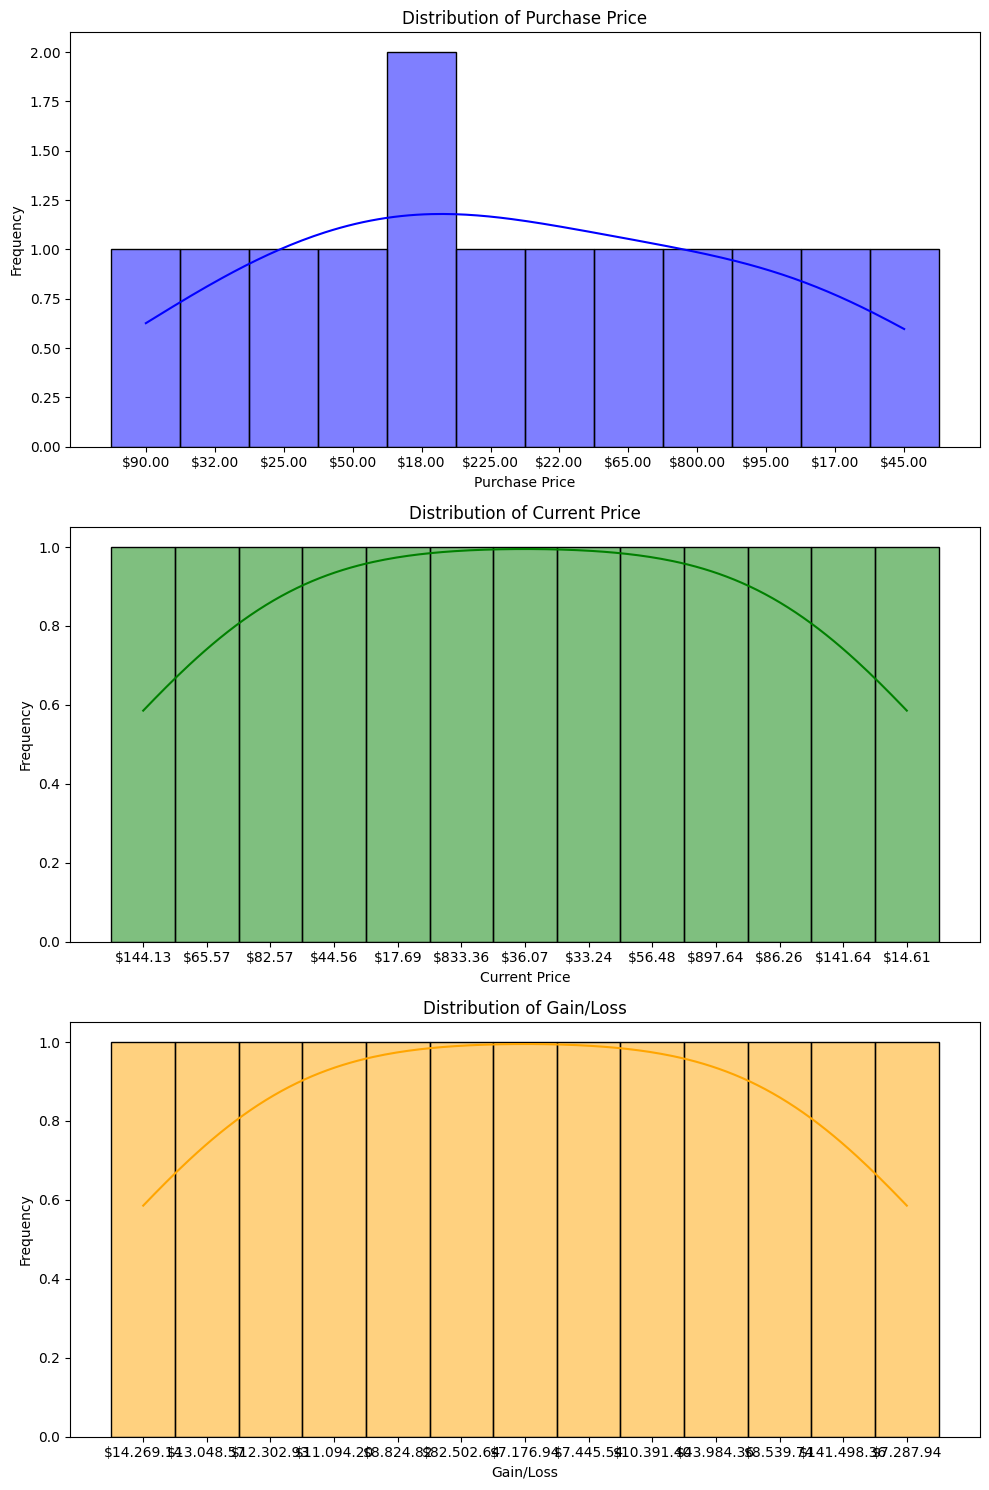

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(data['Purchase Price'], bins=10, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Purchase Price')
axes[0].set_xlabel('Purchase Price')
axes[0].set_ylabel('Frequency')

sns.histplot(data['Current Price'], bins=10, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Current Price')
axes[1].set_xlabel('Current Price')
axes[1].set_ylabel('Frequency')

sns.histplot(data['Gain/Loss'], bins=10, kde=True, ax=axes[2], color='orange')
axes[2].set_title('Distribution of Gain/Loss')
axes[2].set_xlabel('Gain/Loss')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-20-54b60b262e83>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Dividend/share', x='Stock Name', data=top_5_dividend, palette='Set2', ax=ax)


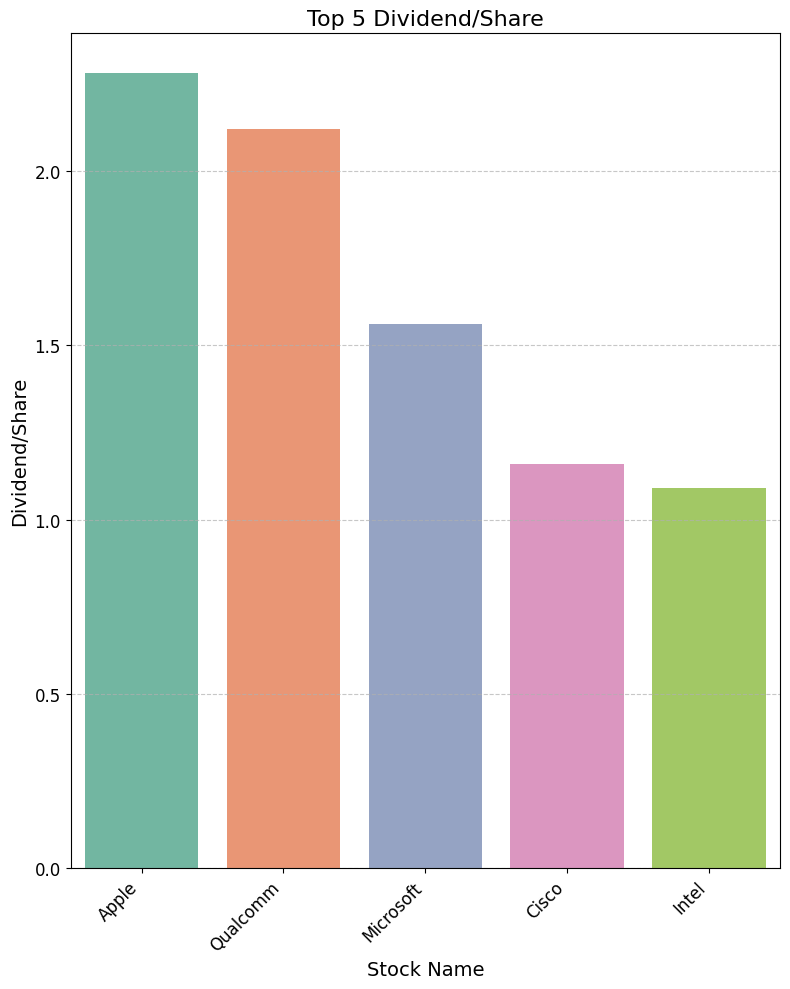

,Stock Name,Symbol,Dividend/share
0,Apple,AAPL,2.28
8,Qualcomm,QCOM,2.12
1,Microsoft,MSFT,1.56
7,Cisco,CSCO,1.16
6,Intel,INTC,1.09


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Dividend/share'] = data['Dividend/share'].replace('[$,]', '', regex=True).astype(float)

top_5_dividend = data.nlargest(5, 'Dividend/share')[['Stock Name', 'Symbol', 'Dividend/share']]

fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(y='Dividend/share', x='Stock Name', data=top_5_dividend, palette='Set2', ax=ax)
ax.set_title('Top 5 Dividend/Share', fontsize=16)
ax.set_ylabel('Dividend/Share', fontsize=14)
ax.set_xlabel('Stock Name', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

top_5_dividend

<ipython-input-24-45bfa43795a7>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stock Name', y='Market Value', data=top_5_market_value, palette='BuGn_r', orient='v')


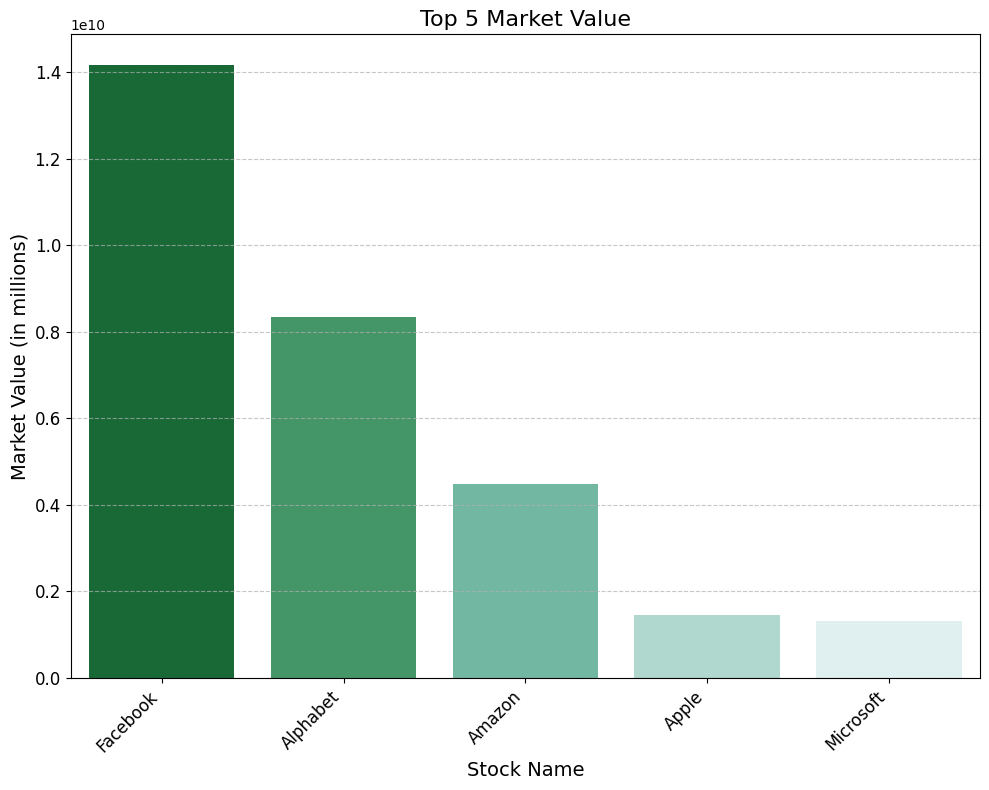

,Stock Name,Symbol,Market Value
11,Facebook,FB,1.416400e+10
5,Alphabet,GOOG,8.333600e+09
9,Amazon,AMZN,4.488200e+09
0,Apple,AAPL,1.441327e+09
1,Microsoft,MSFT,1.311414e+09


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Market Value'] = data['Market Value'].astype(str)
data['Market Value'] = data['Market Value'].str.replace('.', '', regex=False).str.replace(',', '.')
data['Market Value'] = data['Market Value'].replace('[$,]', '', regex=True).astype(float)

top_5_market_value = data.nlargest(5, 'Market Value')[['Stock Name', 'Symbol', 'Market Value']]

plt.figure(figsize=(10, 8))
sns.barplot(x='Stock Name', y='Market Value', data=top_5_market_value, palette='BuGn_r', orient='v')
plt.title('Top 5 Market Value', fontsize=16)
plt.xlabel('Stock Name', fontsize=14)
plt.ylabel('Market Value (in millions)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

top_5_market_value



<ipython-input-32-d67785af4560>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stock Name', y='Annual Yield', data=top_7_annual_yield, palette='icefire', orient='v')


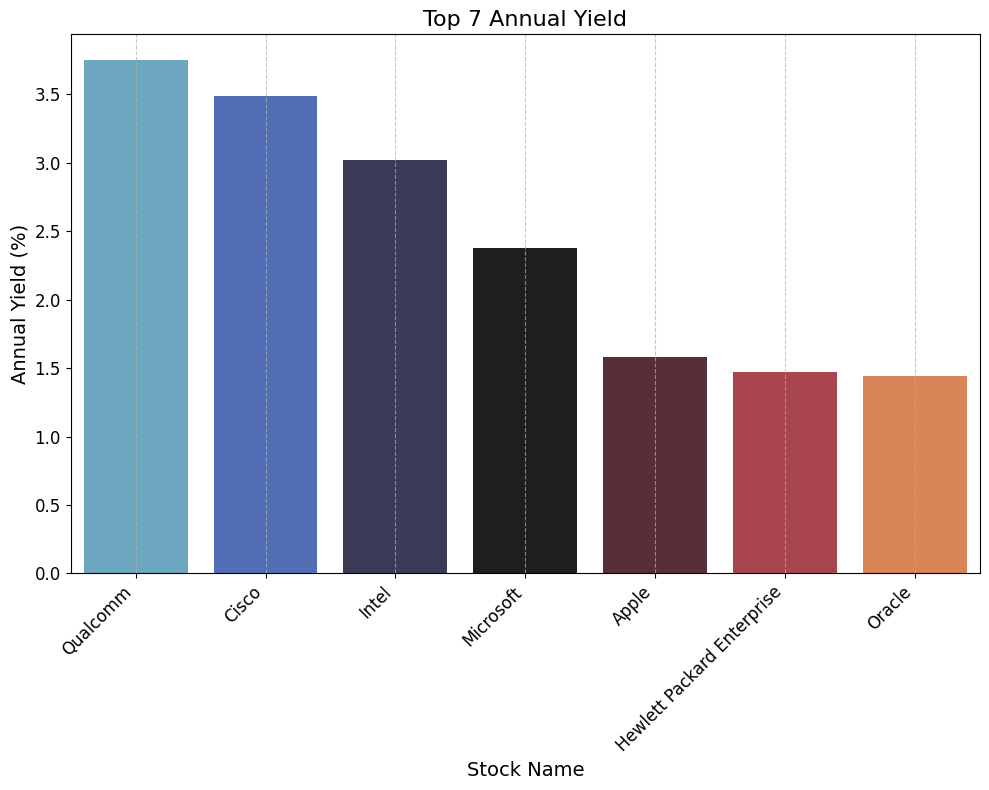

,Stock Name,Symbol,Annual Yield
8,Qualcomm,QCOM,3.75
7,Cisco,CSCO,3.49
6,Intel,INTC,3.02
1,Microsoft,MSFT,2.38
0,Apple,AAPL,1.58
4,Hewlett Packard Enterprise,HPE,1.47
3,Oracle,ORCL,1.44


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghapus simbol persen jika ada dan mengonversi kolom 'Annual Yield' ke tipe data float
data['Annual Yield'] = data['Annual Yield'].replace('[\%,]', '', regex=True).astype(float)

# Mendapatkan 7 saham dengan Annual Yield tertinggi
top_7_annual_yield = data.nlargest(7, 'Annual Yield')[['Stock Name', 'Symbol', 'Annual Yield']]

# Menampilkan barplot untuk top 7 Annual Yield dengan gaya vertikal dan palet warna 'mako'
plt.figure(figsize=(10, 8))
sns.barplot(x='Stock Name', y='Annual Yield', data=top_7_annual_yield, palette='icefire', orient='v')
plt.title('Top 7 Annual Yield', fontsize=16)
plt.xlabel('Stock Name', fontsize=14)
plt.ylabel('Annual Yield (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Menampilkan tabel untuk top 7 Annual Yield
top_7_annual_yield
